# Final Project _ Census_Income_groupC

age: Age

workclass: Nature of employment

functional_weight: Sample weight of the individual from the original Census data. How likely they were to be included in this dataset, based on their demographic characteristics vs. whole-population estimates.

education: Level of education completed

education_num: Estimated years of education completed based on the value of the education field.

marital_status: Marital status

occupation: Occupation category

relationship: Relationship to the household

race: Race

sex: Gender

capital_gain: Amount of capital gains

capital_loss: Amount of capital loss

hours_per_week: Hours worked per week

native_country: Country of birth

income_bracket: Either ">50K" or "<=50K" based on income.


# Task:


##### Predict how much the person is likely to get paid based on his background by training a binary classification model.

##### The target variable income_bracket means: What is the annual income of a person? >50K or <=50K.

In [56]:
# pakages import

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




In [57]:
# Data load
df = pd.read_csv("census_income.csv") 
df

,Unnamed: 0,id,age,sex,race,marital_status,relationship_label,relationship,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,country_name,income_bracket
0,0,1623,17,Male,White,Married-civ-spouse,0,Husband,221129,9th,5,Private,Other-service,0,0,40,39,United-States,<=50K
1,1,14761,17,Male,White,Never-married,3,Own-child,191260,9th,5,Private,Other-service,1055,0,24,39,United-States,<=50K
2,2,14762,17,Male,Black,Never-married,3,Own-child,32124,9th,5,Local-gov,Other-service,0,0,9,39,United-States,<=50K
3,3,14769,17,Male,Black,Never-married,3,Own-child,127003,9th,5,?,?,0,0,40,39,United-States,<=50K
4,4,14796,17,Male,Black,Never-married,3,Own-child,133449,9th,5,Private,Other-service,0,0,26,39,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,23939,90,Female,Black,Widowed,1,Not-in-family,166343,1st-4th,2,?,?,0,0,40,39,United-States,<=50K
32557,32557,24137,90,Female,White,Separated,1,Not-in-family,175444,7th-8th,4,?,?,0,0,15,39,United-States,<=50K
32558,32558,24250,90,Female,White,Never-married,1,Not-in-family,137018,HS-grad,9,Private,Other-service,0,0,40,39,United-States,<=50K
32559,32559,24839,90,Female,White,Widowed,1,Not-in-family,77053,HS-grad,9,?,?,0,4356,40,39,United-States,<=50K


In [ ]:
df.columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 19 columns):
Unnamed: 0            32561 non-null int64
id                    32561 non-null int64
age                   32561 non-null int64
sex                   32561 non-null object
race                  32561 non-null object
marital_status        32561 non-null object
relationship_label    32561 non-null int64
relationship          32561 non-null object
functional_weight     32561 non-null int64
education             32561 non-null object
education_num         32561 non-null int64
workclass             32561 non-null object
occupation            32561 non-null object
capital_gain          32561 non-null int64
capital_loss          32561 non-null int64
hours_per_week        32561 non-null int64
native_country        32561 non-null int64
country_name          32561 non-null object
income_bracket        32561 non-null object
dtypes: int64(10), object(9)
memory usage: 4.7+ MB


In [4]:
df.nunique()

Unnamed: 0            32561
id                    32561
age                      73
sex                       2
race                      5
marital_status            7
relationship_label        6
relationship              6
functional_weight     21648
education                16
education_num            16
workclass                 9
occupation               15
capital_gain            119
capital_loss             92
hours_per_week           94
native_country           42
country_name             42
income_bracket            2
dtype: int64

In [5]:
df.functional_weight.isnull().count()

32561

In [170]:

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [58]:
# percent of missing data per column and column's unique values
def df_info(df, showdf=False): 
    percent_missing = df.isnull().sum() / df.shape[0] * 100
    dfm = pd.DataFrame(df.columns, columns=['col_name'])
    dfm['%_missed'] = percent_missing.values
    dfm['n_missed'] = df.shape[0] - df.count().values
    dfm['value_counts'] = df.count().values
    dfm['sum'] = [ df[c].sum() if df[c].dtype != 'object' else '' for c in df.columns ]
    dfm['col_type'] = df.dtypes.values
    dfm['uniqcount'] = [ len(df[c].unique()) for c in df.columns ]
    dfm['unique_values_list'] = [df[c].unique() if str(df[c].dtype)=='object' else f'{df[c].min()}...{df[c].max()}'  for c in df.columns ]
    if showdf : 
        print(dfm)
    return dfm

In [4]:
df_info(df)

,col_name,%_missed,n_missed,value_counts,sum,col_type,uniqcount,unique_values_list
0,Unnamed: 0,0.0,0,32561,530093080,int64,32561,0...32560
1,id,0.0,0,32561,530093080,int64,32561,0...32560
2,age,0.0,0,32561,1256257,int64,73,17...90
3,sex,0.0,0,32561,,object,2,"[ Male, Female]"
4,race,0.0,0,32561,,object,5,"[ White, Black, Other, Amer-Indian-Eskimo, ..."
5,marital_status,0.0,0,32561,,object,7,"[ Married-civ-spouse, Never-married, Widowed..."
6,relationship_label,0.0,0,32561,47095,int64,6,0...5
7,relationship,0.0,0,32561,,object,6,"[ Husband, Own-child, Unmarried, Not-in-fam..."
8,functional_weight,0.0,0,32561,6179373392,int64,21648,12285...1484705
9,education,0.0,0,32561,,object,16,"[ 9th, 10th, 11th, 12th, 7th-8th, HS-grad..."


# Data Cleaning

In [296]:
# Summary per columns /// Actions after EDA 

# Dataset: 32561 rows × 19 columns

# Columns details: 
# Unnamed: 0 - drop
# id -  int - keep 
# age - int - mean - 38, min - 17, max- 90, keep. /// drop outliers > 76 years ( 195 observations)
# sex - obj - categorial, male-  21790, female- 10771 - keep
# race - obj- categorial -               ///// race  drop as white is 85$ of total and target is distributed the same as for all
    #    White                 27816
    #    Black                  3124
    #    Asian-Pac-Islander     1039
    #    Amer-Indian-Eskimo      311
    #    Other                   271   - keep 
# marital_status - obj - categorial:           ////change 7 categories to 4 ( inclue in other)
    #    Married-civ-spouse        14976
    #    Never-married            10683
    #    Divorced                  4443
    #    Separated                 1025
    #    Widowed                    993
    #    Married-spouse-absent      418
    #    Married-AF-spouse           23 ?? 

#   (People reported as separated included those with legal separations, those living apart with intentions of   obtaining  a divorce, and other people permanently or temporarily separated because of marital discord.

#   The group “other married, spouse absent” includes married people living apart because either the husband or wife was employed and living at a considerable distance from home, was serving away from home in the Armed Forces, had moved to another area, or had a different place of residence for any other reason except separation as defined above.)


# relationship_label - int -  drop  // drop
    # 0    13193
    # 1     8305
    # 3     5068
    # 4     3446
    # 5     1568
    # 2      981

# relationship - obj -categorial               ///// replace 6 categories to 3 
    #  Husband           13193
    #  Not-in-family      8305
    #  Own-child          5068
    #  Unmarried          3446
    #  Wife               1568
    #  Other-relative      981

# functional_weight - int  -      ///// Standart Scaler

# education - obj - cat -keep         

    #  HS-grad         10501
    #  Some-college     7291
    #  Bachelors        5355
    #  Masters          1723
    #  Assoc-voc        1382
    #  11th             1175
    #  Assoc-acdm       1067
    #  10th              933
    #  7th-8th           646
    #  Prof-school       576
    #  9th               514
    #  12th              433
    #  Doctorate         413
    #  5th-6th           333
    #  1st-4th           168
    #  Preschool          51
    
# education_num - int   -drop 

# workclass - obj , //// combine categories

# occupation -    //// combine categories and replace ? by most usual

        #  Prof-specialty       4140
        #  Craft-repair         4099
        #  Exec-managerial      4066
        #  Adm-clerical         3770
        #  Sales                3650
        #  Other-service        3295
        #  Machine-op-inspct    2002
        #  ?                    1843
        #  Transport-moving     1597
        #  Handlers-cleaners    1370
        #  Farming-fishing       994
        #  Tech-support          928
        #  Protective-serv       649
        #  Priv-house-serv       149
        #  Armed-Forces            9

# capital_gain & # capital_loss   - int - investigate. Gain - delete outliers = 99999, loss - keeep


# native_country  - drop
# country_name ////// separated to 2 group : US and other 



# hours_per_week from 0 to 99


## Columns to drop

In [59]:
# Columns to drop
col_to_drop = ['id','Unnamed: 0', 'relationship_label', 'education_num', 'native_country', 'race']


col_to_drop_after_eda = ['race']


Drop doubled columns except of country to investigate


In [60]:
# Drop columns
df.drop(col_to_drop, axis=1, inplace=True)

In [176]:
df

,age,sex,marital_status,relationship,functional_weight,education,workclass,occupation,capital_gain,capital_loss,hours_per_week,country_name,income_bracket
0,17,Male,Married-civ-spouse,Husband,221129,9th,Private,Other-service,0,0,40,United-States,<=50K
1,17,Male,Never-married,Own-child,191260,9th,Private,Other-service,1055,0,24,United-States,<=50K
2,17,Male,Never-married,Own-child,32124,9th,Local-gov,Other-service,0,0,9,United-States,<=50K
3,17,Male,Never-married,Own-child,127003,9th,?,?,0,0,40,United-States,<=50K
4,17,Male,Never-married,Own-child,133449,9th,Private,Other-service,0,0,26,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Female,Widowed,Not-in-family,166343,1st-4th,?,?,0,0,40,United-States,<=50K
32557,90,Female,Separated,Not-in-family,175444,7th-8th,?,?,0,0,15,United-States,<=50K
32558,90,Female,Never-married,Not-in-family,137018,HS-grad,Private,Other-service,0,0,40,United-States,<=50K
32559,90,Female,Widowed,Not-in-family,77053,HS-grad,?,?,0,4356,40,United-States,<=50K


# Categorical features

In [61]:
# Categorical features to be encoded

categorical_features = ['sex','marital_status', 'relationship', 'education', 'workclass', 'occupation', 'country_name']



# Target distribution

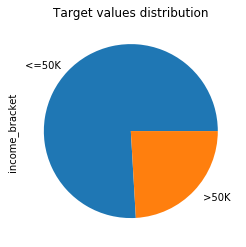

In [62]:
df.income_bracket.value_counts().plot(kind="pie")
plt.title(f"Target values distribution")
plt.grid()
plt.show()

In [25]:
df.income_bracket.value_counts()

 <=50K    24720
 >50K      7841
Name: income_bracket, dtype: int64

Target is distributed not symmetrical .<=50K - 24720 (75%), >=50K - 7841(25%)

# Exploratory Data Analysis


# Age

In [323]:
df.age.mean()

38.543484970063574

Average age - 38 years 

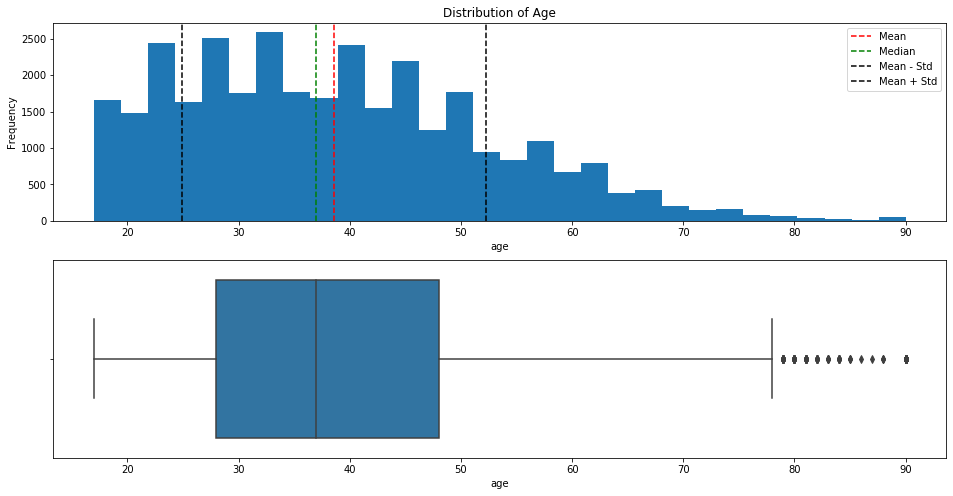

In [63]:
# plot the df['Age'].mean()
age_mean = df['age'].mean()
age_median = df['age'].median()
age_std = df['age'].std()
age_missing = df['age'].isnull().sum()

plt.figure(figsize=(16,8))
plt.subplot(211)
df['age'].plot.hist(bins=30)
plt.axvline(age_mean, color='red', linestyle='--')
plt.axvline(age_median, color='green', linestyle='--')
plt.axvline(age_mean - age_std, color='black', linestyle='--')
plt.axvline(age_mean + age_std, color='black', linestyle='--')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.legend(['Mean', 'Median', 'Mean - Std', 'Mean + Std'])

plt.subplot(212)
sns.boxplot(df['age'])

plt.show()

In [10]:
# Avarage, min, max age
df.age.mean(), df.age.min(), df.age.max()

(38.58164675532078, 17, 90)

In [11]:

df['age'][df['age'] > 76].count()


195

In [12]:

x = df[df['age'] > 76]
x.income_bracket.value_counts()
# 35/(160+35)

 <=50K    160
 >50K      35
Name: income_bracket, dtype: int64

195 people are more then 76 years ( 5%). their income distribution is 18%  50K and 72%  <=50K
#### Decision to drop them as outliers

In [91]:
df[df['age'] > 76].shape


(195, 14)

In [97]:
x.shape

(195, 15)

In [64]:
# Drop Age outliers > 76years

df.drop(df[df['age'] > 76].index , inplace=True)

In [329]:
df.shape

(32208, 13)

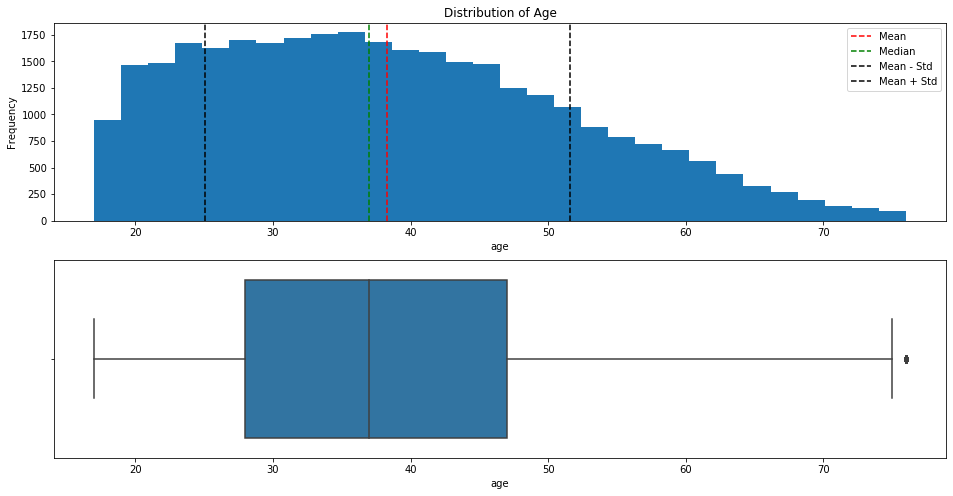

In [65]:
# plot the df['Age'].mean()
age_mean = df['age'].mean()
age_median = df['age'].median()
age_std = df['age'].std()
age_missing = df['age'].isnull().sum()

plt.figure(figsize=(16,8))
plt.subplot(211)
df['age'].plot.hist(bins=30)
plt.axvline(age_mean, color='red', linestyle='--')
plt.axvline(age_median, color='green', linestyle='--')
plt.axvline(age_mean - age_std, color='black', linestyle='--')
plt.axvline(age_mean + age_std, color='black', linestyle='--')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.legend(['Mean', 'Median', 'Mean - Std', 'Mean + Std'])

plt.subplot(212)
sns.boxplot(df['age'])

plt.show()

# Sex

In [104]:
df.sex.value_counts()

 Male      21654
 Female    10712
Name: sex, dtype: int64

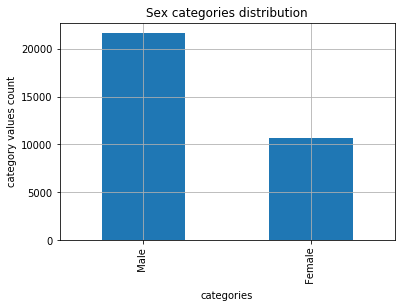

In [105]:
# Plot Sex 
df.sex.value_counts().plot(kind="bar")
plt.title("Sex categories distribution")
plt.ylabel("category values count")
plt.xlabel("categories")
plt.grid()
plt.show()

Sex - categorial feature will be encoded

# Race

In [119]:
df.race.value_counts()

 White                 27641
 Black                  3114
 Asian-Pac-Islander     1032
 Amer-Indian-Eskimo      309
 Other                   270
Name: race, dtype: int64

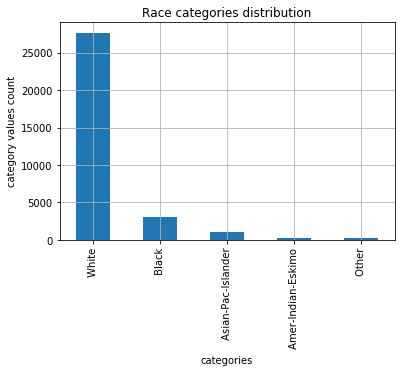

In [121]:
# Plot race
df.race.value_counts().plot(kind="bar")
plt.title("Race categories distribution")
plt.ylabel("category values count")
plt.xlabel("categories")
plt.grid()
plt.show()

White is 85 % of total observations , 9,6% of black , total 5 categories including other

In [125]:
3114/df.shape[0]

0.09621207439906074

In [16]:
df.shape

(32366, 13)

In [17]:
mask = df.race =='Other'
# grouped = df[mask].groupby("income_bracket")
# grouped.head()
df[mask]

AttributeError: 'DataFrame' object has no attribute 'race'

In [94]:
# how many Fare values equal to 0
df1 = df[df['race'] == " Other"]
df1

,age,sex,race,marital_status,relationship,functional_weight,education,workclass,occupation,capital_gain,capital_loss,hours_per_week,country_name,income_bracket
111,17,Male,Other,Never-married,Own-child,289405,11th,Private,Machine-op-inspct,0,0,12,United-States,<=50K
207,17,Male,Other,Never-married,Other-relative,168203,7th-8th,Private,Farming-fishing,0,0,40,Mexico,<=50K
335,18,Male,Other,Never-married,Own-child,179484,12th,?,?,0,0,40,United-States,<=50K
432,18,Male,Other,Never-married,Own-child,210828,Some-college,Private,Handlers-cleaners,0,0,30,United-States,<=50K
776,19,Male,Other,Never-married,Not-in-family,369678,HS-grad,?,?,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31099,53,Female,Other,Divorced,Other-relative,220640,Bachelors,?,?,0,0,20,United-States,<=50K
31371,56,Female,Other,Widowed,Unmarried,247119,7th-8th,Private,Machine-op-inspct,0,0,40,Dominican-Republic,<=50K
31596,58,Female,Other,Widowed,Not-in-family,247276,7th-8th,Private,Other-service,0,0,30,United-States,<=50K
32203,66,Female,Other,Widowed,Not-in-family,206560,HS-grad,?,?,0,0,35,Puerto-Rico,<=50K


In [14]:
df1.income_bracket.value_counts()

 <=50K    245
 >50K      25
Name: income_bracket, dtype: int64

In [15]:
# plot income oper race 

pt = df[['race','income_bracket']].pivot_table(index='race', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

KeyError: "['race'] not in index"

Race to drop. White is 85% . The target distribution between white is related to averal target distribution 


# marital_status

In [18]:
df.marital_status.value_counts()

 Married-civ-spouse       14878
 Never-married            10658
 Divorced                  4436
 Separated                 1023
 Widowed                    934
 Married-spouse-absent      414
 Married-AF-spouse           23
Name: marital_status, dtype: int64

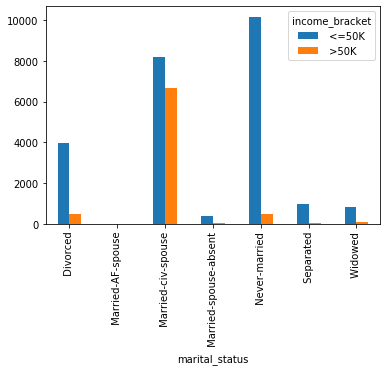

In [19]:
# plot income per marital status

pt = df[['marital_status','income_bracket']].pivot_table(index='marital_status', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

change 7 categories to 4 ( inclue in other)

In [178]:
df.groupby('marital_status').size().sort_values()

marital_status
 Married-AF-spouse           23
 Married-spouse-absent      418
 Widowed                    993
 Separated                 1025
 Divorced                  4443
 Never-married            10683
 Married-civ-spouse       14976
dtype: int64

In [66]:
small_groups = pd.Series(df.groupby('marital_status').size())
small_groups = small_groups[small_groups < len(df['marital_status']) * 0.04]
small_groups_list = list(small_groups.index)
print(small_groups_list)

[' Married-AF-spouse', ' Married-spouse-absent', ' Separated', ' Widowed']


In [67]:
# replace small statuse groups by "Other"
ind_list = df['marital_status'].apply(lambda x: x in small_groups_list)
df.loc[ind_list, 'marital_status'] = 'Other'

df.groupby('marital_status').size()

marital_status
 Divorced               4436
 Married-civ-spouse    14878
 Never-married         10658
Other                   2394
dtype: int64

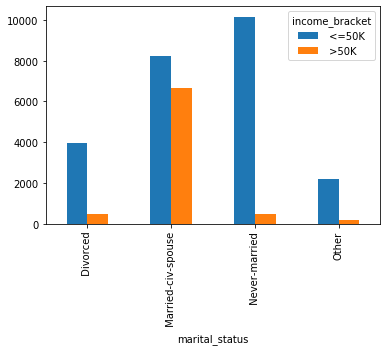

In [68]:
# plot 

pt = df[['marital_status','income_bracket']].pivot_table(index='marital_status', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

# Relationship 



In [240]:
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

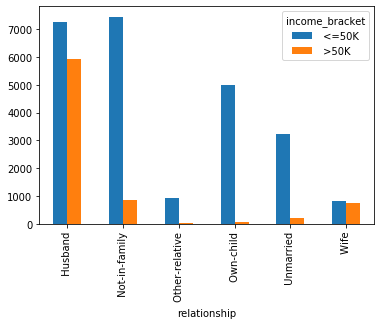

In [182]:
# plot income per relationship

pt = df[['relationship','income_bracket']].pivot_table(index='relationship', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

People who have husband- wife have +- equal distribution of target . Other <=50 significant impact

To keep husband- wife + combine other categories to others 

In [139]:
df.groupby('relationship').size().sort_values()

relationship
 Other-relative      978
 Wife               1563
 Unmarried          3431
 Own-child          5062
 Not-in-family      8231
 Husband           13101
dtype: int64

In [69]:
# Rename columns to Other
df.loc[df['relationship'] == ' Other-relative' , 'relationship'] = 'Other'
df.loc[df['relationship'] == ' Unmarried' , 'relationship'] = 'Other'
df.loc[df['relationship'] == ' Own-child' , 'relationship'] = 'Other'
df.loc[df['relationship'] == ' Not-in-family' , 'relationship'] = 'Other'

df['relationship'].value_counts()

Other       17702
 Husband    13101
 Wife        1563
Name: relationship, dtype: int64

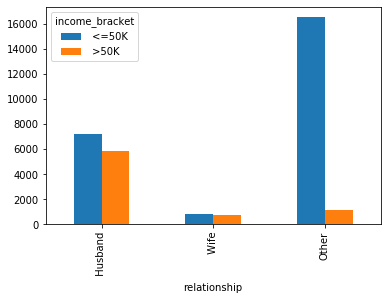

In [70]:
# plot income per relationship

pt = df[['relationship','income_bracket']].pivot_table(index='relationship', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

keep husband, wife , other

# functional_weight - numerical

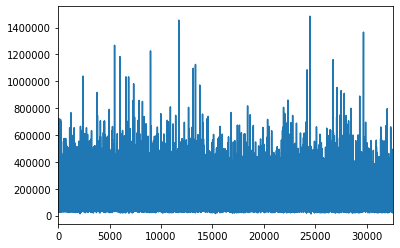

In [241]:
df.functional_weight.plot()

In [345]:
df.functional_weight.describe()

count    32208.000000
mean         0.001573
std          1.000993
min         -1.681631
25%         -0.681483
50%         -0.105988
75%          0.451534
max         12.268563
Name: functional_weight, dtype: float64

In [346]:
df.functional_weight.value_counts()

-0.632576    13
 0.129890    13
-0.242433    13
-0.723975    12
-0.650454    12
             ..
-0.056414     1
 2.486317     1
 1.491019     1
-0.689981     1
 1.511740     1
Name: functional_weight, Length: 21422, dtype: int64

### Starndart Scaller

In [25]:
# # apply standartization on the data
# # from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df.functional_weight = scaler.fit_transform(df.functional_weight.values.reshape(-1, 1))

# Education   ???

In [37]:
df.education.value_counts()

 HS-grad         10439
 Some-college     7266
 Bachelors        5330
 Masters          1709
 Assoc-voc        1376
 11th             1170
 Assoc-acdm       1063
 10th              929
 7th-8th           623
 Prof-school       568
 9th               510
 12th              432
 Doctorate         408
 5th-6th           328
 1st-4th           164
 Preschool          51
Name: education, dtype: int64

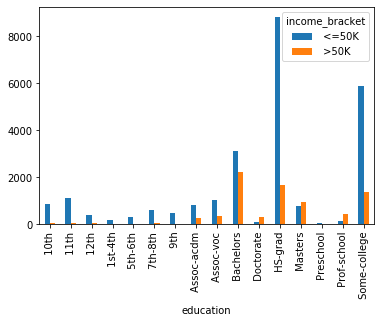

In [186]:
# plot income per education

pt = df[['education','income_bracket']].pivot_table(index='education', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

In [71]:
# Combine columns to Other
df.loc[df['education'] == ' Preschool' , 'education'] = 'Other'
df.loc[df['education'] == ' 1st-4th' , 'education'] = 'Other'
df.loc[df['education'] == ' 5th-6th' , 'education'] = 'Other'
df.loc[df['education'] == ' 7th-8th' , 'education'] = 'Other'

df.loc[df['education'] == ' 9th' , 'education'] = 'Other'
df.loc[df['education'] == ' 10th' , 'education'] = 'Other'
df.loc[df['education'] == ' 11th' , 'education'] = 'Other'
df.loc[df['education'] == ' 12th' , 'education'] = 'Other'
df.loc[df['education'] == ' Assoc-acdm' , 'education'] = 'Other'
df.loc[df['education'] == ' Assoc-voc' , 'education'] = 'Other'
df.loc[df['education'] == ' Some-college' , 'education'] = 'Other'

df['education'].value_counts()

Other           13912
 HS-grad        10439
 Bachelors       5330
 Masters         1709
 Prof-school      568
 Doctorate        408
Name: education, dtype: int64

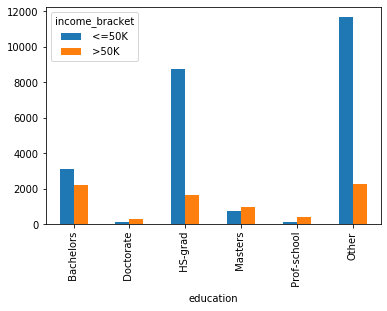

In [72]:
# plot income per education

pt = df[['education','income_bracket']].pivot_table(index='education', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

combine 10 categories to 1 Other = college and below

In [193]:
df

,age,sex,marital_status,relationship,functional_weight,education,workclass,occupation,capital_gain,capital_loss,hours_per_week,country_name,income_bracket
0,17,Male,Married-civ-spouse,Husband,0.297026,Other,Private,Other-service,0,0,40,United-States,<=50K
1,17,Male,Never-married,Other,0.014037,Other,Private,Other-service,1055,0,24,United-States,<=50K
2,17,Male,Never-married,Other,-1.493670,Other,Local-gov,Other-service,0,0,9,United-States,<=50K
3,17,Male,Never-married,Other,-0.594755,Other,?,?,0,0,40,United-States,<=50K
4,17,Male,Never-married,Other,-0.533683,Other,Private,Other-service,0,0,26,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Female,Other,Other,-0.222034,Other,?,?,0,0,40,United-States,<=50K
32557,90,Female,Other,Other,-0.135809,Other,?,?,0,0,15,United-States,<=50K
32558,90,Female,Never-married,Other,-0.499869,HS-grad,Private,Other-service,0,0,40,United-States,<=50K
32559,90,Female,Other,Other,-1.067997,HS-grad,?,?,0,4356,40,United-States,<=50K


# workclass

In [200]:
df.workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

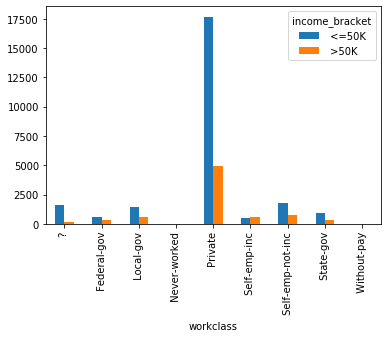

In [28]:
# plot income per workclass

pt = df[['workclass','income_bracket']].pivot_table(index='workclass', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

1783 observations with ? value. Rename to most common Privat

In [73]:

# Rename all "?" to Privat
df.loc[df['workclass'] == ' ?' , 'workclass'] = ' Private'

Combine categories in government; without pay; self emploeyd



In [74]:
# Combining categories
df.loc[df['workclass'] == ' Never-worked' , 'workclass'] = ' Without-pay'

df.loc[df['workclass'] == ' Federal-gov' , 'workclass'] = ' Gov'
df.loc[df['workclass'] == ' State-gov' , 'workclass'] = ' Gov'
df.loc[df['workclass'] == ' Local-gov' , 'workclass'] = ' Gov'

df.loc[df['workclass'] == ' Self-emp-not-inc' , 'workclass'] = ' Self-emp-inc'



In [31]:
df.workclass.value_counts()

 Private         24401
 Gov              4336
 Self-emp-inc     3608
 Without-pay        21
Name: workclass, dtype: int64

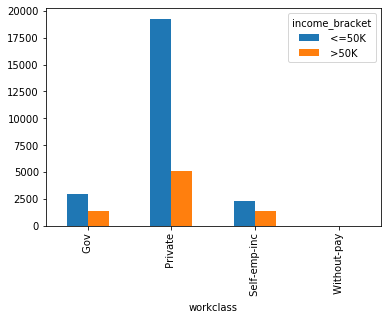

In [75]:
# plot income per worclass

pt = df[['workclass','income_bracket']].pivot_table(index='workclass', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

# occupation

In [214]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

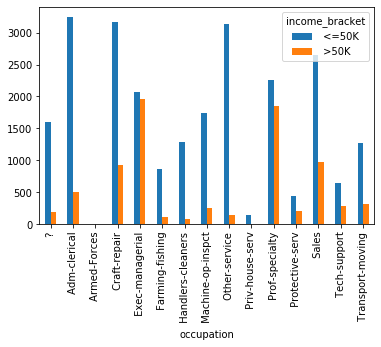

In [32]:
# plot income per category
pt = df[['occupation','income_bracket']].pivot_table(index='occupation', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

? value replace by the most the same target distribution amoug top 5 categories

In [76]:
df.loc[df['occupation'] == ' ?' , 'occupation'] = ' Adm-clerical'

In [77]:
df.occupation.value_counts()

 Adm-clerical         5543
 Prof-specialty       4119
 Craft-repair         4091
 Exec-managerial      4035
 Sales                3631
 Other-service        3280
 Machine-op-inspct    1996
 Transport-moving     1594
 Handlers-cleaners    1367
 Farming-fishing       982
 Tech-support          928
 Protective-serv       647
 Priv-house-serv       144
 Armed-Forces            9
Name: occupation, dtype: int64

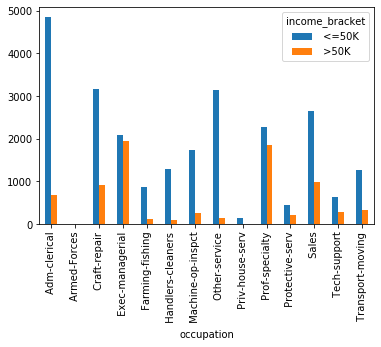

In [78]:
# plot income per category
pt = df[['occupation','income_bracket']].pivot_table(index='occupation', columns='income_bracket', 
                                              aggfunc=len, fill_value=0) 

pt.plot.bar()

### Simple Imputer

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)

# imp.fit(X)
# X = pd.DataFrame(data= imp.transform(X), columns=X.columns)

# Country_name

In [219]:
df.country_name.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

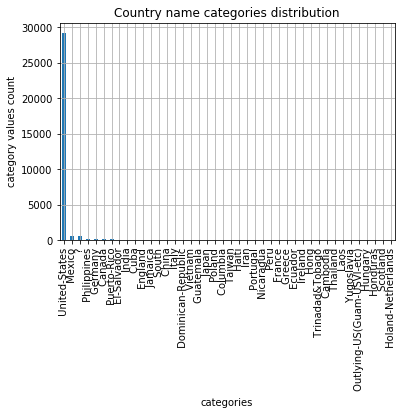

In [221]:
# Plot country name
df.country_name.value_counts().plot(kind="bar")
plt.title("Country name categories distribution")
plt.ylabel("category values count")
plt.xlabel("categories")
plt.grid()
plt.show()

Separate to 2 group : US and other ( US - 29170 observations or 90% of total observations)

In [79]:
df['country_name'] = [' United-States' if x ==' United-States' else 'Other' for x in df['country_name']]

In [36]:
df.country_name.value_counts()

 United-States    28996
Other              3370
Name: country_name, dtype: int64

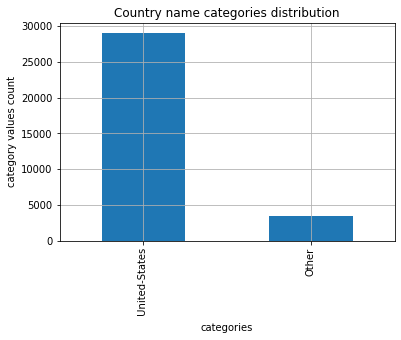

In [80]:
# Plot country name
df.country_name.value_counts().plot(kind="bar")
plt.title("Country name categories distribution")
plt.ylabel("category values count")
plt.xlabel("categories")
plt.grid()
plt.show()

# Plot all numerical features

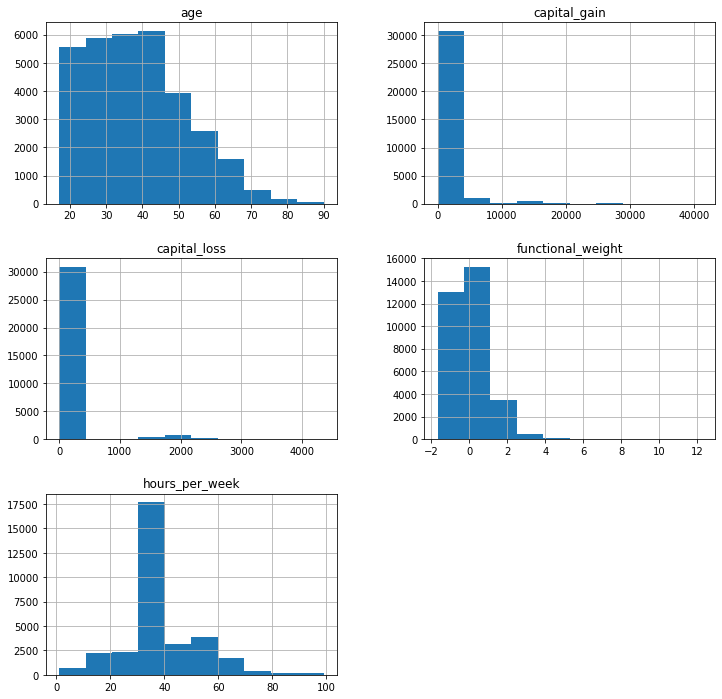

In [297]:
# Plot the category

num_features = df.dtypes[df.dtypes != 'object']
df[list(num_features.index)].hist(figsize = (12,12));

# capital_gain and capital_loss analysis 

In [224]:
df.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [240]:
df.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [268]:
df.loc[df['capital_gain'] > 0,:].describe()

,age,functional_weight,capital_gain,capital_loss,hours_per_week
count,2553.000000,2553.000000,2553.000000,2553.0,2553.000000
mean,43.870349,-0.018970,7516.444575,0.0,43.118684
std,13.390214,0.980586,5581.898066,0.0,12.087051
min,17.000000,-1.615149,114.000000,0.0,1.000000
25%,34.000000,-0.682326,3325.000000,0.0,40.000000
50%,42.000000,-0.131081,6514.000000,0.0,40.000000
75%,52.000000,0.442050,8614.000000,0.0,50.000000
max,90.000000,7.991064,41310.000000,0.0,99.000000


In [245]:
29849/32561 , 31042/32561

(0.9167101747489328, 0.9533490986149074)

92% of gain and 95% of loss are 0 value. MAx gain - 99999, Max loss - 4356. Need more investigation 

Lets investigate gain and loos > 0 


In [247]:

capital_loss_df = df[df['capital_loss']>0]
capital_gain_df = df[df['capital_gain']>0]

capital_loss_df.shape, capital_gain_df.shape


((1519, 13), (2712, 13))

1519 observagion with gain  0 and 2712 with loss > 0

In [250]:

# Number of observation where gain and loss both are zero:
      
df[(df['capital_loss'] == 0) & (df['capital_gain'] == 0)].shape

(28330, 13)

In [251]:
28330/32561

0.8700592733638401

87% of observation where gain and loss both are zero

In [259]:
# Number of observation with max gain 99999:
df.loc[df['capital_gain'] == 99999].shape


(159, 13)

In [260]:
# Number of observation with max gain 99999 and target >=50K
df.loc[df['capital_gain'] == 99999]['income_bracket'].value_counts()

 >50K    159
Name: income_bracket, dtype: int64

Income of the people with gain =  max 99999 is >= 50K, so they are outliers and should be excluded

In [81]:
# Drop outliers ( 159 observation with gain = 99999)

# df.drop(df[df['age'] > 76].index , inplace=True)
df.drop(df[df['capital_gain'] == 99999].index, inplace=True)

In [39]:
df.shape

(32208, 13)

In [294]:
df.loc[df['capital_loss'] > 0,:].describe()

,age,functional_weight,capital_gain,capital_loss,hours_per_week
count,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,-0.040602,0.0,1871.428571,43.252798
std,12.625609,0.924899,0.0,376.571535,12.247258
min,17.000000,-1.599507,0.0,155.000000,1.000000
25%,32.000000,-0.671961,0.0,1672.000000,40.000000
50%,41.000000,-0.138982,0.0,1887.000000,40.000000
75%,50.000000,0.371518,0.0,1977.000000,50.000000
max,90.000000,5.940136,0.0,4356.000000,99.000000


In [295]:
 df.loc[df['capital_loss'] > 0,:].count()

age                  1519
sex                  1519
marital_status       1519
relationship         1519
functional_weight    1519
education            1519
workclass            1519
occupation           1519
capital_gain         1519
capital_loss         1519
hours_per_week       1519
country_name         1519
income_bracket       1519
dtype: int64

1519 people have loss above 0. Max loss 4356, mean - 1871

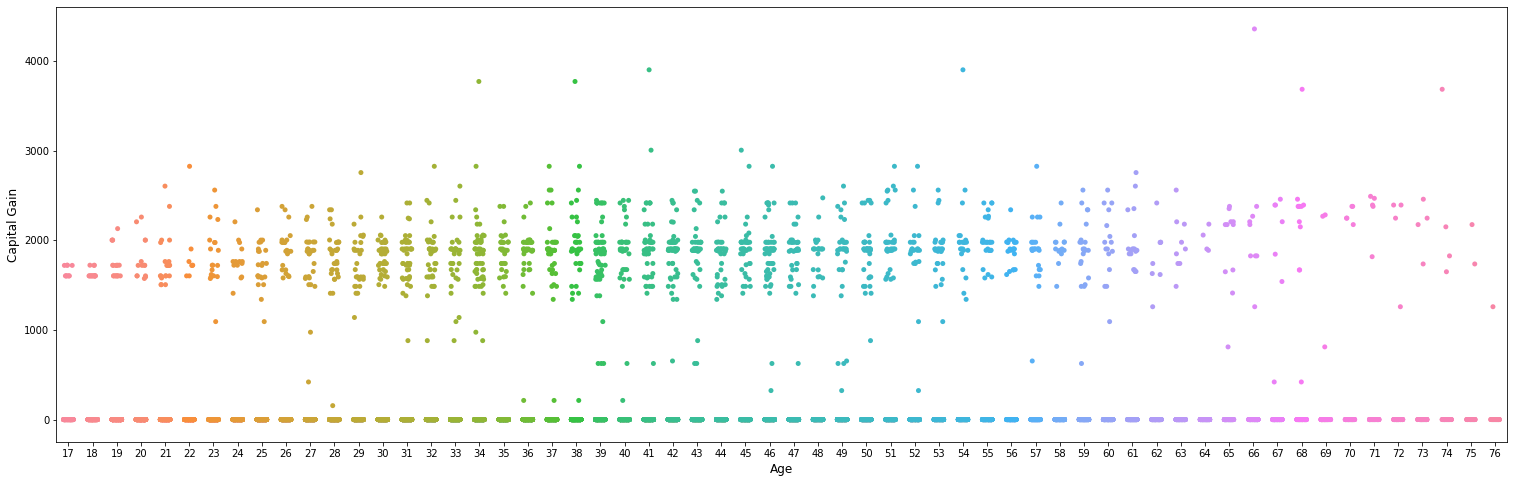

In [82]:
# plot ctital loss per age 

fig = plt.figure(figsize = (26,8))
sns.stripplot('age', 'capital_loss', data = df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);


In [332]:
df.loc[df['capital_loss'] > 3000,:].count()

age                  9
sex                  9
marital_status       9
relationship         9
functional_weight    9
education            9
workclass            9
occupation           9
capital_gain         9
capital_loss         9
hours_per_week       9
country_name         9
income_bracket       9
dtype: int64

11 0bservation with capital loss > 3000 .8 with <=50K income, 3 with >50K. Will drop outliers

In [333]:
df.loc[df['capital_loss'] > 3000,:]['income_bracket'].value_counts()

 <=50K    6
 >50K     3
Name: income_bracket, dtype: int64

In [334]:
df.drop(df[df['age'] > 76].index , inplace=True)

In [335]:
df.shape

(32208, 13)

# hours_per_week

In [336]:
df.hours_per_week.describe()

count    32208.000000
mean        40.471808
std         12.255721
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [41]:
df.loc[df['hours_per_week'] ==99]['income_bracket'].value_counts()

 <=50K    59
 >50K     25
Name: income_bracket, dtype: int64

To keep values with max hours per week

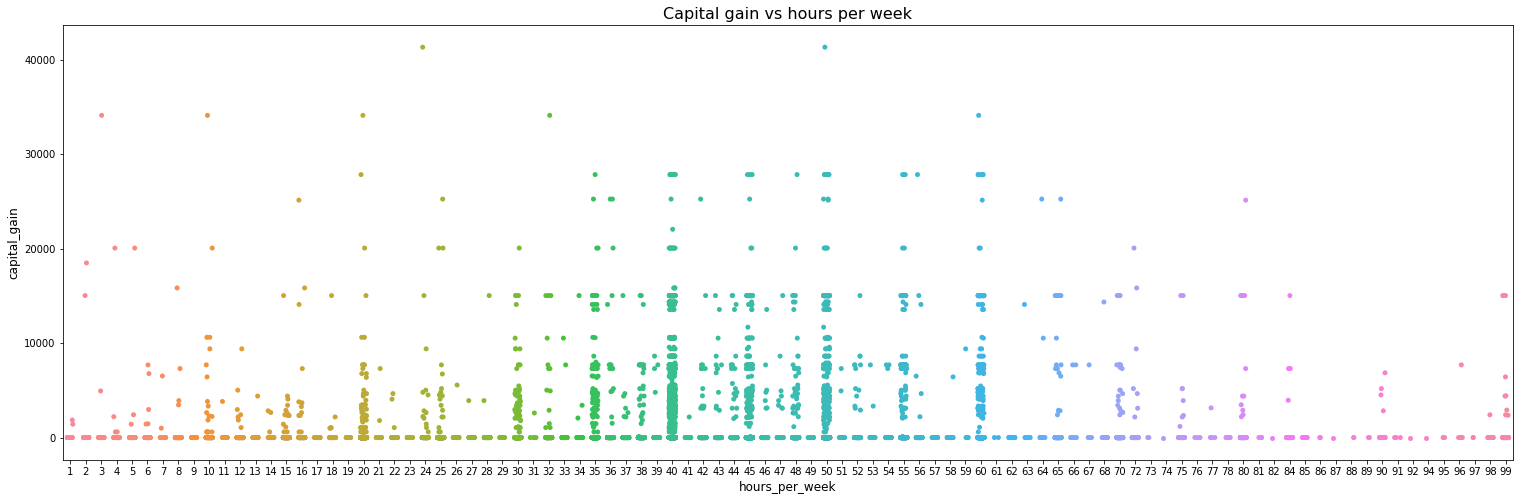

In [343]:
# plot ctital loss per age 

fig = plt.figure(figsize = (26,8))
sns.stripplot('hours_per_week', 'capital_gain', data = df,
         jitter = 0.2);

plt.title('Capital gain vs hours per week', fontsize=16)
plt.xlabel('hours_per_week',fontsize = 12);
plt.ylabel('capital_gain',fontsize = 12);


Hours per week from 0 to 99. Mean 40. there are several outliers of capital gain > 3900 within people who work 20-50 hours per week

# Correlation

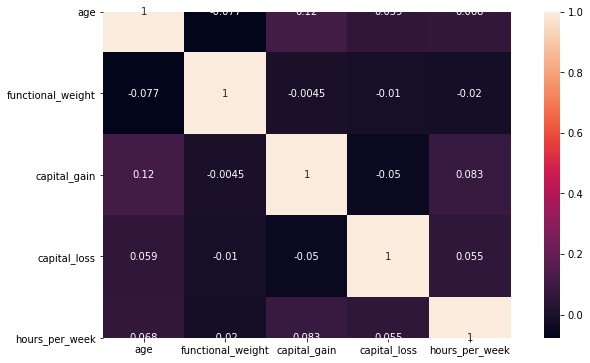

In [292]:

fig = plt.figure(figsize = (12,6))

sns.heatmap(df.corr(),annot = True,square = True)


Strong correlation between gain and hours per week, age and hours per week , negative correlation weight and age

# Function to dummy all categorial features 

In [83]:
categorical_features

['sex',
 'marital_status',
 'relationship',
 'education',
 'workclass',
 'occupation',
 'country_name']

In [84]:
def get_dummy (df, categorical_features):
    for x in categorical_features:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df
    

In [85]:
df = get_dummy(df, categorical_features )

In [86]:
df

,age,functional_weight,capital_gain,capital_loss,hours_per_week,income_bracket,sex_ Female,sex_ Male,marital_status_ Divorced,marital_status_ Married-civ-spouse,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,country_name_ United-States,country_name_Other
0,17,221129,0,0,40,<=50K,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,17,191260,1055,0,24,<=50K,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,17,32124,0,0,9,<=50K,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,17,127003,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,133449,0,0,26,<=50K,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,76,25319,0,0,15,<=50K,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32498,76,278938,0,0,20,<=50K,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32499,76,98695,0,0,20,<=50K,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
32500,76,169133,0,0,30,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Standart Scaller 

In [94]:
# apply standartization on the data
# from sklearn.preprocessing import StandardScaler

col_to_scale = ['age', 'capital_gain', 'capital_loss', 'hours_per_week' ]

scaler = StandardScaler()

df.age = scaler.fit_transform(df.age.values.reshape(-1, 1))

df.capital_gain = scaler.fit_transform(df.capital_gain.values.reshape(-1, 1))
df.capital_loss = scaler.fit_transform(df.capital_loss.values.reshape(-1, 1))
df.hours_per_week = scaler.fit_transform(df.hours_per_week.values.reshape(-1, 1))
df.functional_weight = scaler.fit_transform(df.functional_weight.values.reshape(-1, 1))




In [88]:
df.income_bracket.value_counts()

 <=50K    24560
 >50K      7648
Name: income_bracket, dtype: int64

# Target  Encoding

In [89]:
# Assign to target 0 if <=50K and 1 if > 50K

df['income_bracket'] = [0 if x == ' <=50K' else 1 for x in df['income_bracket']]

# X = df.drop('income_bracket', 1)
# y = df.income_bracket

In [96]:
df.income_bracket.value_counts()

0    24560
1     7648
Name: income_bracket, dtype: int64

In [95]:
df

,age,functional_weight,capital_gain,capital_loss,hours_per_week,income_bracket,sex_ Female,sex_ Male,marital_status_ Divorced,marital_status_ Married-civ-spouse,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,country_name_ United-States,country_name_Other
0,-1.606277,0.295164,-0.230925,-0.217452,-0.038498,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,-1.606277,0.012452,0.183088,-0.217452,-1.344031,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.606277,-1.493783,-0.230925,-0.217452,-2.567968,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,-1.606277,-0.595746,-0.230925,-0.217452,-0.038498,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.606277,-0.534734,-0.230925,-0.217452,-1.180839,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,2.847134,-1.558193,-0.230925,-0.217452,-2.078393,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32498,2.847134,0.842331,-0.230925,-0.217452,-1.670414,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32499,2.847134,-0.863683,-0.230925,-0.217452,-1.670414,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
32500,2.847134,-0.196982,-0.230925,-0.217452,-0.854456,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Write the final file to csv

In [97]:
df.to_csv('df_out.csv')